In [81]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline

In [82]:
# Load the dataset
file_path = 'blackjack_simulator.csv'
data = pd.read_csv(file_path, sep=',', nrows=500000)
data.head(20)

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",['BJ'],[['S']],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1,0,-1.0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[[3, 4, 11]]",[18],"[['H', 'S']]",-2,0,-1.0
6,0,383,6,"[3, 3]","[6, 10, 10]",26,"[[3, 2, 10], [3, 4, 5]]","[15, 12]","[['P', 'H', 'S'], ['H', 'S']]",-1,0,2.0
7,0,374,3,"[10, 8]","[3, 10, 7]",20,"[[10, 8]]",[18],[['S']],2,0,-1.0
8,0,369,5,"[8, 10]","[5, 10, 9]",24,"[[8, 10]]",[18],[['S']],1,0,1.0
9,0,364,9,"[6, 8]","[9, 2, 5, 11]",17,"[[6, 8, 6]]",[20],"[['H', 'S']]",0,0,1.0


In [83]:
# Preparing the dataset
data['initial_hand'] = data['initial_hand'].apply(eval)
data['dealer_final'] = data['dealer_final'].apply(eval)
data['player_final'] = data['player_final'].apply(eval)
data['actions_taken'] = data['actions_taken'].apply(eval)
data = data.explode('player_final')
data['actions_taken'] = data['actions_taken'].apply(lambda x: [item for sublist in x for item in (sublist if isinstance(sublist, list) else [sublist])])
data = data.explode('actions_taken')
data.head(20)

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[10, 11]",['BJ'],S,1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[5, 5, 11]",[21],H,-2,0,1.0
1,0,411,10,"[5, 5]","[10, 8]",18,"[5, 5, 11]",[21],S,-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[3, 10]",[13],S,-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[5, 9, 11, 3]",[18],H,-1,0,0.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[5, 9, 11, 3]",[18],H,-1,0,0.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[5, 9, 11, 3]",[18],S,-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[6, 10, 10]",[26],H,-1,0,-1.0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[3, 4, 11]",[18],H,-2,0,-1.0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[3, 4, 11]",[18],S,-2,0,-1.0


In [84]:
# Filter for 'H' and 'S' actions
data = data[data['actions_taken'].isin(['H', 'S'])]
data['action_binary'] = data['actions_taken'].apply(lambda x: 1 if x == 'S' else 0)

# Prepare features and target variable
features = pd.DataFrame({
    'dealer_card': data['dealer_up'],
    'player_total': data['player_final'].apply(lambda hand: sum(hand) if isinstance(hand, list) else hand),
    'player_ace': data['player_final'].apply(lambda hand: 1 if 11 in hand else 0)
})
target = data['action_binary']

data.head(20)

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win,action_binary
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[10, 11]",['BJ'],S,1,0,1.5,1
1,0,411,10,"[5, 5]","[10, 8]",18,"[5, 5, 11]",[21],H,-2,0,1.0,0
1,0,411,10,"[5, 5]","[10, 8]",18,"[5, 5, 11]",[21],S,-2,0,1.0,1
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[3, 10]",[13],S,-2,0,1.0,1
3,0,401,10,"[5, 9]","[10, 8]",18,"[5, 9, 11, 3]",[18],H,-1,0,0.0,0
3,0,401,10,"[5, 9]","[10, 8]",18,"[5, 9, 11, 3]",[18],H,-1,0,0.0,0
3,0,401,10,"[5, 9]","[10, 8]",18,"[5, 9, 11, 3]",[18],S,-1,0,0.0,1
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[6, 10, 10]",[26],H,-1,0,-1.0,0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[3, 4, 11]",[18],H,-2,0,-1.0,0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[3, 4, 11]",[18],S,-2,0,-1.0,1


In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [86]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.59      0.69     52214
           1       0.75      0.90      0.82     71654

    accuracy                           0.77    123868
   macro avg       0.79      0.75      0.76    123868
weighted avg       0.78      0.77      0.77    123868

Accuracy: 0.774033648722834


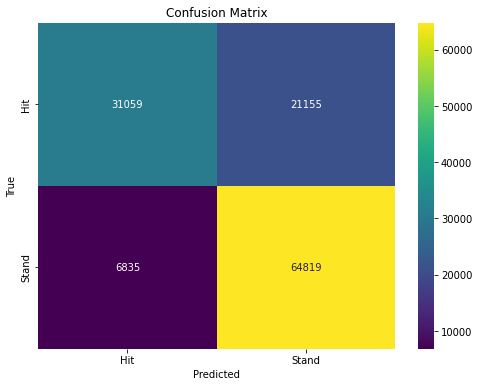

In [87]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Hit', 'Stand'], yticklabels=['Hit', 'Stand'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Win Ratio: 0.5772130888141854
Loss Ratio: 0.4227869111858145


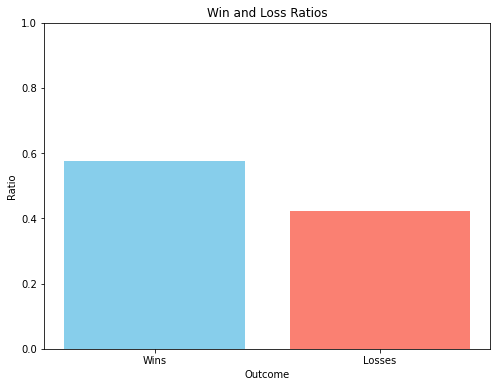

In [88]:
# Calculate win and loss ratios
total_samples = len(data)
win_count = len(data[data['action_binary'] == 1])
loss_count = len(data[data['action_binary'] == 0])
win_ratio = win_count / total_samples
loss_ratio = loss_count / total_samples

print("Win Ratio:", win_ratio)
print("Loss Ratio:", loss_ratio)

# Visualize win and loss ratios
plt.figure(figsize=(8, 6))
plt.bar(['Wins', 'Losses'], [win_ratio, loss_ratio], color=['skyblue', 'salmon'])
plt.xlabel('Outcome')
plt.ylabel('Ratio')
plt.title('Win and Loss Ratios')
plt.ylim(0, 1)  # Set y-axis limit to ensure ratio is between 0 and 1
plt.show()

In [89]:
def predict_action(dealer_card, player_total, player_has_ace, model):
    """Predicts the best action ('Hit' or 'Stand') based on the model and plots the results."""
    input_features = pd.DataFrame({
        'dealer_card': [dealer_card],
        'player_total': [player_total],
        'player_ace': [1 if player_has_ace else 0]
    })
    action_prob = model.predict_proba(input_features)[0]
    actions = ['Hit', 'Stand']
    action = actions[model.predict(input_features)[0]]

    # Output the recommended action
    print(f"Recommended action: {action}")
    print(f"Probability of 'Hit': {action_prob[0]:.2f}")
    print(f"Probability of 'Stand': {action_prob[1]:.2f}")

    # Plotting the probabilities as a bar chart
    plt.figure(figsize=(8, 4))
    sns.barplot(x=actions, y=action_prob, color='mediumturquoise')  # Specify a single color or different colors for each bar
    plt.title('Action Probabilities')
    plt.ylabel('Probability')
    plt.show()

    # Pie chart visualization of probabilities
    plt.figure(figsize=(6, 6))
    plt.pie(action_prob, labels=actions, autopct='%1.1f%%', startangle=90, colors=['tomato', 'mediumseagreen'])
    plt.title('Action Distribution')
    plt.show()


Example Predictions:
Recommended action: Stand
Probability of 'Hit': 0.28
Probability of 'Stand': 0.72


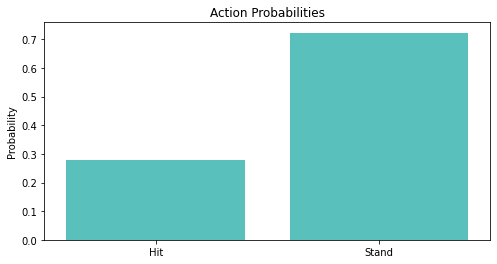

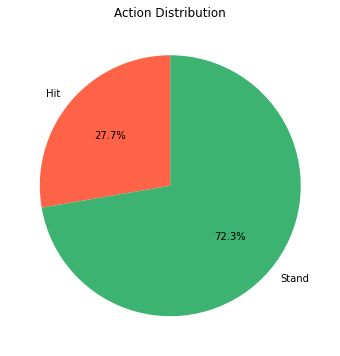

Recommended action: Stand
Probability of 'Hit': 0.10
Probability of 'Stand': 0.90


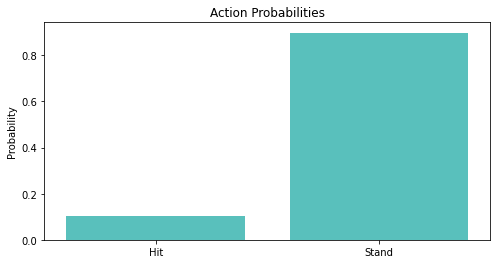

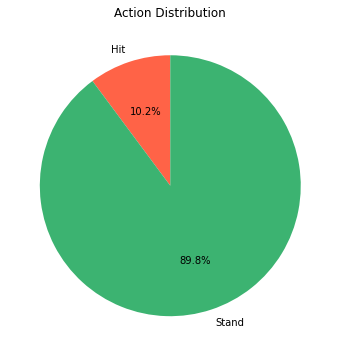

In [90]:
print("\nExample Predictions:")
predict_action(10, 15, False, model)  # Example where dealer shows 10 and player has total 15 without an ace
predict_action(6, 12, True, model)    # Example where dealer shows 6 and player has total 12 with an ace